In [67]:
import pandas as pd
import json
import cv2
import os
import matplotlib.pyplot as plt


data=pd.read_csv("Downloads/Doctor_prescriptions.csv")
region_shape_att=data["region_shape_attributes"]
path="Desktop/adnan_img" 
file=data["filename"]
region_id=data["region_id"]
region_attributes=data["region_attributes"]

#print(file[200])
#print(region_shape_att[200])
#img=os.listdir("Desktop/All Images")
#print(img[10])

flag=0
ROI_number=0
img_path=[]
annotation=[]


for idx,region in enumerate(region_shape_att):
    
    try:
        if(flag==20):
            ROI_number+=1
            flag=0;
            #break
            
        region=json.loads(region)        #convert string to dictionary
        
        img_arr=cv2.imread(os.path.join(path,file[idx]),cv2.IMREAD_GRAYSCALE)
        
        #r,img_arr=cv2.threshold(img_arr, 160, 255, cv2.THRESH_BINARY)
        x,y,h,w=region["x"],region["y"],region["height"],region["width"]
        
        new_img=img_arr[y:y+h,x:x+w]
        
        dirr='Desktop/splite/prescription_{}_{}.png'.format(ROI_number,region_id[idx])
        
        cv2.imwrite(dirr, new_img)
        
        flag+=1
        
        
        med_name=json.loads(region_attributes[idx])
        
        img_path.append(dirr)
        
        annotation.append(med_name["name"].lower())
        
        
    except:
        pass

dictionary={"img_path":img_path,"annotation":annotation}

df=pd.DataFrame(dictionary,columns=["img_path","annotation"])

df.to_csv("Desktop/Handwriting_dataset.csv",index=False,header=True)

#cv2.imshow()
#cv2.waitKey()



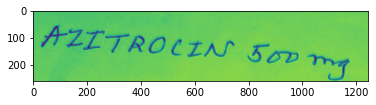

In [91]:
import numpy as np

d=pd.read_csv("Desktop/Handwriting_dataset.csv")
a,b=d["img_path"],d["annotation"]
img=cv2.imread(a[200],cv2.IMREAD_GRAYSCALE)
img=np.array(img)

plt.imshow(img)
plt.show()